In [1]:
!pip install pandas
!pip install torch
!pip install nltk
!pip install tqdm
!pip install seaborn
!pip install numpy
!pip install sklearn

    100% |████████████████████████████████| 10.4MB 3.4MB/s ta 0:00:011
    100% |████████████████████████████████| 512kB 7.3MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.5MB 7.7MB/s ta 0:00:011
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 61kB 4.7MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading v

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Скачиваем данные

In [5]:
# если ругается на то, что нет wget
!apt-get update
!apt-get install wget

Hit:1 http://archive.ubuntu.com/ubuntu xenial InRelease
Get:2 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release.gpg [819 B]
Get:8 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]       
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [833 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Packages [234 kB]
Get:11 https://developer.download.nvidia.com/compute/machine-learnin

In [4]:
!wget https://github.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/blob/master/week_05/data/answers_subsample.csv?raw=true -O data.csv

--2019-10-24 11:54:56--  https://github.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/blob/master/week_05/data/answers_subsample.csv?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/raw/master/week_05/data/answers_subsample.csv [following]
--2019-10-24 11:54:57--  https://github.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/raw/master/week_05/data/answers_subsample.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/master/week_05/data/answers_subsample.csv [following]
--2019-10-24 11:54:57--  https://raw.githubusercontent.com/BobaZooba/HSE-Deep-Learning-in-NLP-Course/master/week_05/data/answers_subsample.csv
Resolving raw.githubusercontent.com (raw.gi

In [5]:
!ls -l

total 4458520
-rw-r--r-- 1 root root     385785 Oct 24 11:52 Classification_Subsample_Mail (2).ipynb
-rw-r--r-- 1 root root 4536408847 Jan 18  2019 cc.ru.300.vec
-rw-r--r-- 1 root root   28717126 Oct 24 11:55 data.csv
-rw-r--r-- 1 root root          0 Oct 23 10:24 onstart.log
-rw-r--r-- 1 root root         75 Oct 23 10:24 onstart.sh


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,category,text
0,business,Могут ли в россельхозбанке дать в залог норков...
1,law,Может ли срочник перевестись на контракт после...
2,business,Продажа недвижимости по ипотеки ? ( арестованы...
3,business,"В чем смысл криптовалюты, какая от неё выгода ..."
4,law,часть 1 статья 158 похитил телефон
...,...,...
237774,relax,елку нарядили? =)
237775,law,"Имеется переработка при 75% ставки, отгулы не ..."
237776,food,Попробовала варить рис с половиной кубика для ...
237777,food,Почему рекоменд... Почему рекомендуют есть фру...


In [11]:
data.category.value_counts() * 100 / data.shape[0]

law         29.793211
relax       22.016242
business    19.309527
food        18.367055
love        10.513965
Name: category, dtype: float64

# Предобученные эмбеддинги
[Источник](https://fasttext.cc/docs/en/crawl-vectors.html)  
Вы можете взять любые word2vec подобные эмббединги. Если вы хотите использовать elmo, bert, etc сначала попробуйте с word2vec подобными эмббедингами, а потом можете перейти к более сложным моделям.  
Ниже мы сначала скачиваем, а потом распоковываем эмбеддинги.

In [12]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
!gzip -d cc.ru.300.vec.gz

--2019-10-23 10:30:17--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306357571 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ru.300.vec.gz’

cc.ru.300.vec.gz    100%[===================>]   1.22G  9.38MB/s    in 3m 14s  

2019-10-23 10:33:32 (6.42 MB/s) - ‘cc.ru.300.vec.gz’ saved [1306357571/1306357571]



In [13]:
!ls -l

total 4458352
-rw-r--r-- 1 root root     215072 Oct 23 10:32 Classification_Subsample_Mail (2).ipynb
-rw-r--r-- 1 root root 4536408847 Jan 18  2019 cc.ru.300.vec
-rw-r--r-- 1 root root   28717126 Oct 23 10:30 data.csv
-rw-r--r-- 1 root root          0 Oct 23 10:24 onstart.log
-rw-r--r-- 1 root root         75 Oct 23 10:24 onstart.sh


In [5]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from tqdm.auto import tqdm

In [6]:
# потом можете добавить свою предобработку

def process_text(text):
    
    words = wordpunct_tokenize(text.lower())
    
    return words

In [7]:
word2freq = {}
lengths = []

for text in tqdm(data.text):
    
    words = process_text(text)
    
    lengths.append(len(words))
    
    for word in words:
        
        if word in word2freq:
            word2freq[word] += 1
        else:
            word2freq[word] = 1

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


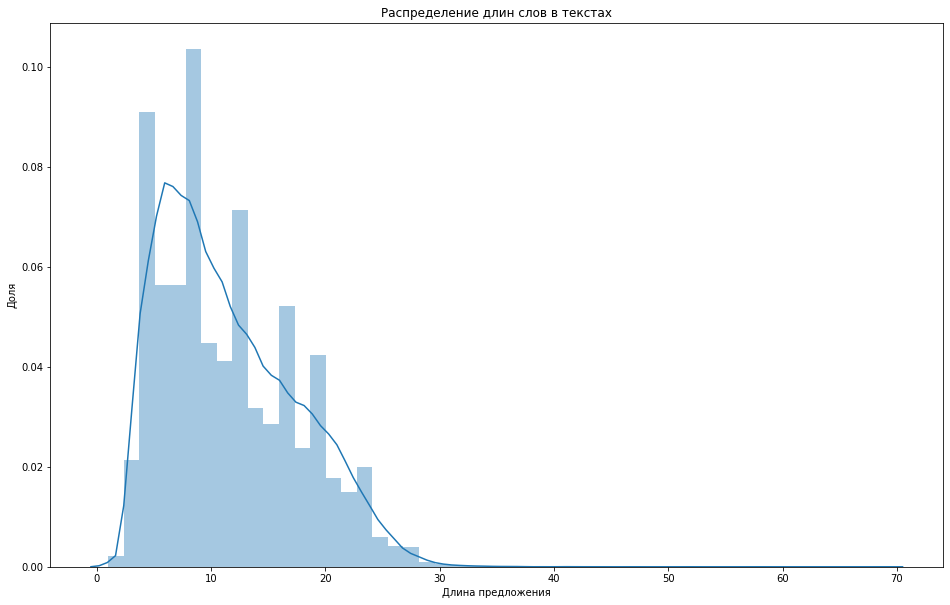

In [9]:
plt.figure(figsize=(16, 10))
plt.title('Распределение длин слов в текстах')
plt.xlabel('Длина предложения')
plt.ylabel('Доля')
#plt.plot(lengths)
sns.distplot(lengths)

In [19]:
upper_threshold = 32
lower_threshold = 3

correct_percent = len([sent_len for sent_len in lengths 
                       if sent_len <= upper_threshold and sent_len >= lower_threshold]) * 100 / len(lengths)

'{:.2f} % наших текстов входят в промежуток от {} до {} слов'.format(correct_percent, lower_threshold, upper_threshold)

'99.66 % наших текстов входят в промежуток от 3 до 32 слов'

In [20]:
len(word2freq)

152179

In [21]:
'{} слов, которые встречались 3 и менее раз'.format(len([word for word in word2freq if word2freq[word] <= 3]))

'114332 слов, которые встречались 3 и менее раз'

# Читаем файл с эмбеддингами
### Этот файл с 300 числами для 2 000 000 слов и он может не влезть в память
Поэтому прочитаем только те слова, которые мы знаем

In [10]:
import numpy as np

In [11]:
word2index = {'PAD': 0}
vectors = []
    
word2vec_file = open('cc.ru.300.vec')
    
n_words, embedding_dim = word2vec_file.readline().split()
n_words, embedding_dim = int(n_words), int(embedding_dim)

# Zero vector for PAD
vectors.append(np.zeros((1, embedding_dim)))

progress_bar = tqdm(desc='Read word2vec', total=n_words)

while True:

    line = word2vec_file.readline().strip()

    if not line:
        break
        
    current_parts = line.split()

    current_word = ' '.join(current_parts[:-embedding_dim])

    if current_word in word2freq:

        word2index[current_word] = len(word2index)

        current_vectors = current_parts[-embedding_dim:]
        current_vectors = np.array(list(map(float, current_vectors)))
        current_vectors = np.expand_dims(current_vectors, 0)

        vectors.append(current_vectors)

    progress_bar.update(1)

progress_bar.close()

word2vec_file.close()

vectors = np.concatenate(vectors)

In [12]:
len(word2index)

117619

In [13]:
unk_words = [word for word in word2freq if word not in word2index]
unk_counts = [word2freq[word] for word in unk_words]
n_unk = sum(unk_counts) * 100 / sum(list(word2freq.values()))

sub_sample_unk_words = {word: word2freq[word] for word in unk_words}
sorted_unk_words = list(sorted(sub_sample_unk_words, key=lambda x: sub_sample_unk_words[x], reverse=True))

print('Мы не знаем {:.2f} % слов в датасете'.format(n_unk))
print('Количество неизвестных слов {} из {}, то есть {:.2f} % уникальных слов в словаре'.format(
    len(unk_words), len(word2freq), len(unk_words) * 100 / len(word2freq)))
print('В среднем каждое встречается {:.2f} раз'.format(np.mean(unk_counts)))
print()
print('Топ 5 невошедших слов:')

for i in range(5):
    print(sorted_unk_words[i], 'с количеством вхождениий -', word2freq[sorted_unk_words[i]])

Мы не знаем 2.50 % слов в датасете
Количество неизвестных слов 34561 из 152179, то есть 22.71 % уникальных слов в словаре
В среднем каждое встречается 1.98 раз

Топ 5 невошедших слов:
??? с количеством вхождениий - 3641
?? с количеством вхождениий - 2448
!!! с количеством вхождениий - 2214
?) с количеством вхождениий - 2069
"? с количеством вхождениий - 1429


# Потеря 2.5 % слов в датасете
Эта ситуация не то, чтобы сильно плохая, в учебных целях нормально, к тому же в среднем они редко встречаются. Вы можете поиграть с предобработкой, но советую не заигрываться. Оценивается другое.

In [14]:
import torch

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [27]:
x = torch.rand(128, 64, 1024)

In [28]:
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

In [29]:
%%timeit

pred = lstm(x)

610 ms ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# А что GPU?

In [30]:
print('Доступна ли видеокарта:', torch.cuda.is_available())
print('Если недоступна, поменяйте runtime, если в колабе')

Доступна ли видеокарта: True
Если недоступна, поменяйте runtime, если в колабе


In [31]:
# универсальных способ задать device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# если доступна gpu, то давайте ее использовать, но в этом задании должны использовать

In [32]:
# перенесли x на gpu
x_gpu = x.to(device)

In [33]:
# зададим lstm на gpu
lstm_gpu = torch.nn.LSTM(1024, 512, batch_first=True)
lstm_gpu = lstm_gpu.to(device)

In [34]:
%%timeit

pred = lstm_gpu(x_gpu)

41.1 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# У меня на 1070 TI скорость уменьшилась с 381мс до 41мс, то есть в 9.29 раз

In [0]:
# если у нас модель на гпу, а то, что мы туда подаем нет, то работать не будет
# справедлива и обратная ситуация

# выскочит ошибка
# посмотрите на нее, возможно, вы еще встретитесь
# pred = lstm_gpu(x)

# Важные и не очень интуитивные моменты про LSTM и CNN в торче

По умолчанию LSTM принимает данные с такой размерностью:
```python
(seq_len, batch, input_size)
```
Сделано это с целью оптимизации на более низком уровне.  
Мы оперируем такими объектами:
```python
(batch, seq_len, input_size)
```
Чтобы LSTM у нас заработала правильно, мы можем либо передать параметр ```batch_first=True``` во время инициализации слоя,
либо транспонировать (поменять) первую и вторую размерность у нашего x перед подачей в слой.  
[Подробнее про LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [35]:
# первый способ
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [36]:
pred.shape

torch.Size([128, 64, 512])

In [37]:
lstm = torch.nn.LSTM(1024, 512)

# меняем размерность batch и seq_len местами
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [38]:
# у нас все еще осталась размерность (seq_len, batch, input_size)
pred_transposed.shape

torch.Size([64, 128, 512])

In [39]:
# просто транспонируем еще раз
pred = pred_transposed.transpose(0, 1)
pred.shape

torch.Size([128, 64, 512])

## Conv1d & MaxPool1d
Примерно такая же ситуация происходит со сверточными слоями и пулингами.  
1d реализация как раз для текстов, в ней матрица-фильтр ходит только по одной размерности.  
[Подробнее про CNN](https://pytorch.org/docs/stable/nn.html#conv1d)  
[Подробнее про пулинг](https://pytorch.org/docs/stable/nn.html#maxpool1d)  
Ожидается такая размерность:
```python
(batch, input_size, seq_len)
```
Мы все еще хоти подавать такую размерность:
```python
(batch, seq_len, input_size)
```
В случае со свертками и пулингами у нас есть вариант только транспонировать x перед подачей и транспонировать полученный результат. Обратите внимание, что транспонируем мы первую и вторую размерность (индексация с нуля).

In [40]:
x.shape

torch.Size([128, 64, 1024])

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [41]:
# in_channels - размер входных эмбеддингов
# out_channels - количество/какой размер эмбеддингов мы хотим получить
# kernel_size - размер окна/н-граммы
cnn = torch.nn.Conv1d(in_channels=1024, out_channels=512, kernel_size=3)

In [42]:
# выпадет ошибка, посмотрите какая
# pred = cnn(x)

In [43]:
x_transposed = x.transpose(1, 2)
x_transposed.shape
# перевели в (batch, input_size, seq_len)

torch.Size([128, 1024, 64])

In [44]:
pred_transposed = cnn(x_transposed)
pred_transposed.shape
# осталась разрмерность (batch, output_size, seq_len)

torch.Size([128, 512, 62])

In [45]:
# переведем обратно в (batch, seq_len, input_size)
pred = pred_transposed.transpose(1, 2)
pred.shape

torch.Size([128, 62, 512])

# Еще важный момент про LSTM

The input can also be a packed variable length sequence. See [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) or [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for details.

Это внутренняя конструкция торча, которая позволяет не читать токен ```PAD```, но все еще работать с батчами. То есть внутри батча мы можем передать лстмке, что у нас данные переменной длины. Не забудьте что на выход отдается [torch.nn.utils.rnn.PackedSequence](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.PackedSequence).

# Подготовим данные в DataLoader

In [15]:
from torch.utils.data import Dataset, DataLoader

In [16]:
'UNK' in word2index

False

In [17]:
data.head()

,category,text
0,business,Могут ли в россельхозбанке дать в залог норков...
1,law,Может ли срочник перевестись на контракт после...
2,business,Продажа недвижимости по ипотеки ? ( арестованы...
3,business,"В чем смысл криптовалюты, какая от неё выгода ..."
4,law,часть 1 статья 158 похитил телефон


# Замапим категории в индексы

In [18]:
cat_mapper = {cat: n for n, cat in enumerate(data.category.unique())}

In [19]:
cat_mapper

{'business': 0, 'law': 1, 'love': 2, 'relax': 3, 'food': 4}

In [20]:
data.category = data.category.map(cat_mapper)

In [21]:
data.head()

,category,text
0,0,Могут ли в россельхозбанке дать в залог норков...
1,1,Может ли срочник перевестись на контракт после...
2,0,Продажа недвижимости по ипотеки ? ( арестованы...
3,0,"В чем смысл криптовалюты, какая от неё выгода ..."
4,1,часть 1 статья 158 похитил телефон


# Читалка данных

## Что происходит ниже
1. Мы задаем x_data, y_data (таргеты), word2index (маппер из слова в индекс слова), sequence_length (максимальная длина последовательности, если больше, ограничить ею), pad_token (токен паддинга и задаем его индекс pad_index).
1. Загружаем данные:
    1. Проходимся по датасету
    1. Предобрабатываем каждый текст в датасете
    1. Индексируем его
1. Когда нам нужно достать пример из датасета мы берем индексированный ```x``` и соответствующий этому индексу ```y```, наш ```x``` также паддим (или ограничиваем длину) и переводим в ```torch.Tensor(x).long()```. Для ```y``` этого делать не потребуется, в dataloader'е таргеты преобразуются в тензор сами.
    
## Что нужно сделать здесь
1. Дописать индексатор текста
1. Дописать паддинг текста
1. __*Опционально:*__ добавить что-то в предобработку

In [22]:
class WordData(Dataset):
    
    def __init__(self, x_data, y_data, word2index, sequence_length=32, pad_token='PAD', verbose=True):
        
        super().__init__()
        
        self.x_data = []
        self.y_data = y_data
        
        self.word2index = word2index
        self.sequence_length = sequence_length
        
        self.pad_token = pad_token
        self.pad_index = self.word2index[self.pad_token]
        
        self.load(x_data, verbose=verbose)
        
    @staticmethod
    def process_text(text):
        
        # Место для вашей предобработки
    
        words = wordpunct_tokenize(text.lower())

        return words
        
    def load(self, data, verbose=True):
        
        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)
        
        for text in data_iterator:
            
            words = self.process_text(text)
            
            indexed_words = self.indexing(words)
            
            self.x_data.append(indexed_words)
    
    def indexing(self, tokenized_text):

        # здесь мы не используем токен UNK, потому что мы мы его специально не учили
        # становится непонятно какой же эмбеддинг присвоить неизвестному слову,
        # поэтому просто выбрасываем наши неизветсные слова
        
        ### CODE ###
        text_indices = []
        for word in tokenized_text:
            if word in self.word2index:
                text_indices.append(self.word2index[word])
            
        return text_indices
            
    
    def padding(self, sequence):
        
        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        
        ### CODE ###
        if len(sequence) > self.sequence_length:
            sequence = sequence[: self.sequence_length]
        elif len(sequence) < self.sequence_length:
            sequence += [self.pad_index for i in range(self.sequence_length-len(sequence))]
        return sequence
    
    def __len__(self):
        
        return len(self.x_data)
    
    def __getitem__(self, idx):
        
        x = self.x_data[idx]
        x = self.padding(x)
        x = torch.Tensor(x).long()
        
        y = self.y_data[idx]
        
        return x, y

In [23]:
dataset = WordData(data.text, data.category, word2index)

In [24]:
data_loader = DataLoader(dataset, batch_size=64)

In [25]:
for x, y in data_loader:
    break

In [26]:
x

tensor([[  153,   137,     4,  ...,     0,     0,     0],
        [   65,   137, 97522,  ...,     0,     0,     0],
        [ 1584,   955,    17,  ...,     0,     0,     0],
        ...,
        [75752,   137,  8345,  ...,     0,     0,     0],
        [33902,  1327,     0,  ...,     0,     0,     0],
        [  172,  5175,  1015,  ...,     0,     0,     0]])

In [27]:
y

tensor([0, 1, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 4, 1, 2, 4, 4, 4, 1, 0, 3, 3, 1, 1,
        1, 2, 1, 1, 4, 2, 0, 1, 1, 4, 3, 4, 1, 4, 4, 3, 1, 1, 4, 1, 3, 3, 4, 4,
        1, 1, 1, 0, 1, 3, 0, 1, 2, 2, 4, 0, 4, 4, 0, 3])

# Ожидается примерно следующее
```python
tensor([[  153,   137,     4,  ...,     0,     0,     0],
        [   65,   137, 97522,  ...,     0,     0,     0],
        [ 1584,   955,    17,  ...,     0,     0,     0],
        ...,
        [75752,   137,  8345,  ...,     0,     0,     0],
        [33902,  1327,     0,  ...,     0,     0,     0],
        [  172,  5175,  1015,  ...,     0,     0,     0]])
tensor([0, 1, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 4, 1, 2, 4, 4, 4, 1, 0, 3, 3, 1, 1,
        1, 2, 1, 1, 4, 2, 0, 1, 1, 4, 3, 4, 1, 4, 4, 3, 1, 1, 4, 1, 3, 3, 4, 4,
        1, 1, 1, 0, 1, 3, 0, 1, 2, 2, 4, 0, 4, 4, 0, 3])
```

# Обучить нейронку

## План
1. Разбить датасет на трейн/тест или на трейн/валидация/тест, как вам больше нравится
1. Сделать класс нейронки, вписать необходимые операции, базовая архитектура ниже
1. Написать обучалку
1. Добавить логирование
    1. Сохранять лосс на каждой итерции обучения __0.25 балла__
    1. Каждую эпоху сохранять лосс трейна и тест __0.25 балла__
    1. Каждую эпоху рассчитывать метрики __0.25 балла__
    1. Добавить прогресс бар, в котором показывается усредненный лосс последних 500-та итераций __0.25 балла__
1. Добавить early stopping __0.5 балла__
1. Отрисовать графики лосса, метрик, конфьюжин матрицу __0.5 балла__
1. Улучшить результат. Например, можно добавить BatchNorm, Dropout, Residual, etc __1 балл__
1. Сделать макро f1 больше 0.8 __1 балл__
1. Написать какие действия к чему приводили (почему вы их делали и оправдались ли ожидания)

## Базовая архитектура
1. Предобученные эмбеддинги. Почитайте [здесь](https://pytorch.org/docs/stable/nn.html#embedding) (from_pretrained) как вставить свои эмбеддинги, выше мы читали матрицу эмбеддингов. __1 балл__
1. Bidirectional LSTM. __1 балл__
2. Несколько параллельных CNN с разными размерами окна и пулингами к ним. __2 балла__
3. Конкатенация результатов CNN. __0 баллов__ (идет вместе с предыдущим пунктом)
4. Предикт в количество классов. __0 баллов__ (ну все-таки предсказать классы нужно обязательно)

__Дополнительные баллы:__
- Написать GRU с нуля самому __1 балл__
- Побить макро f1 0.84 __1 балл__
- Переобучиться и снизить переобучение за счет трюков. Пояснение: показываете, что вот такая архитектура переобучается, а вот я добавил/а это и это, изменил/а это и это и переобучение ушло __1 балл__
- Добавить селф аттеншин (написанный своими руками) __3 балла__
- За мультихед селф аттеншин еще __1 балл__
- Добавить [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) и [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) для LSTM. Инфа [здесь](#Еще-важный-момент-про-LSTM) __2 балла__
- Добавить дропаут для входа LSTM (не просто стандартный пункт при инициализации LSTM) __1 балл__
- Добавить шедуллеры __1 балл__
- your madness

### TIPs:
- Если будете брать ```train_test_split```, не забудьте сделать ```reset_index```, чтобы по индексу корректно доставались таргеты из ```y_data```  
- Необязательно делить датасет именно на 70 % и 30 %  
- Пулинг можно делать без торчового слоя

# РАЗМЕР ТЕСТА НЕ МЕНЬШЕ 10% ДАТАСЕТА
# 10 БАЛЛОВ МАКСИМУМ

In [59]:
len(dataset)

237779

## Разбиваем датасет на трейн/тест (80%, 20%)

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [29]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [30]:
train_data = WordData(train.text, train.category, word2index)

In [31]:
test_data = WordData(test.text, test.category, word2index)

## Classifier (сначала без дропаутов, батч-норма и т.д.)

In [70]:
class Classifier(torch.nn.Module):
    
    def __init__(self, 
               embedding_tensor, 
               n_classes=5, 
               sequence_len=32, 
               rnn_model='LSTM', 
               padding_index=0, 
               hidden_size=1024,  
               batch_first=True, 
               cnn_out=256, 
               kernel_sizes=[2,3,4]):
  
        super(Classifier, self).__init__()
  
        # embeddings
        self.word_embeddings = torch.nn.Embedding.from_pretrained(embedding_tensor)
        self.word_embeddings.weight.requires_grad = False
        self.embed_size = embedding_tensor.shape[1]
        
        
        # BiLSTM
        if rnn_model == 'LSTM':
            self.BiLSTM = torch.nn.LSTM(input_size=self.embed_size, 
                                      hidden_size=hidden_size, 
                                      batch_first=True, 
                                      bidirectional=True)
    
        # convolutional layers    
        self.CNN_layer_1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[0]),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[0] + 1)) 
    
        self.CNN_layer_2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[1]),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[1] + 1))
    
        self.CNN_layer_3 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[2]),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[2] + 1))

        self.linear = torch.nn.Linear(cnn_out*3, n_classes)  
  
    def forward(self, x):

        x_embed = self.word_embeddings(x)
        
        out_rnn, ht = self.BiLSTM(x_embed, None)
        out_rnn = out_rnn.transpose(1, 2)
        
        out_cnn_1 = self.CNN_layer_1(out_rnn)
        out_cnn_2 = self.CNN_layer_2(out_rnn)
        out_cnn_3 = self.CNN_layer_3(out_rnn)

        out_cnn = torch.cat([out_cnn_1.squeeze(2), 
                             out_cnn_2.squeeze(2), 
                             out_cnn_3.squeeze(2)], dim=1)
    
        pred = self.linear(out_cnn)
        
        return pred

# Обучалка 1

In [71]:
import torch.optim as optim

train_loader = DataLoader(train_data, batch_size=256, drop_last=True)
test_loader = DataLoader(test_data, batch_size=256, drop_last=True)

epochs = 15

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

vectors = torch.FloatTensor(vectors)
model = Classifier(embedding_tensor=vectors).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

iteration_losses = []
epoch_train_losses = []
epoch_test_losses = []
accuracies = []
f_scores = []

In [72]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm

best_test_loss = 1.7 # для early stopping

for n_epoch in range(epochs):
        
    train_losses = []
    test_losses = []
    test_targets = []
    test_preds = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    for x, y in train_loader:
        
        optimizer.zero_grad()
        pred = model.forward(x.to(device))            
        loss = criterion(pred, y.long().to(device))  
        loss.backward()
        optimizer.step() 
        
        iteration_losses.append(loss.item())
        train_losses.append(loss.item())
        progress_bar.set_postfix(loss=np.mean(iteration_losses[-500:]))
        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    epoch_train_losses.append(np.mean(train_losses))
  
    for x_test, y_test in test_loader:
        with torch.no_grad():
            pred = model.forward(x_test.to(device))
            test_preds.append(pred.cpu()) 
        test_targets.append(y_test.long())
        loss = criterion(pred, y_test.long().to(device))
        test_losses.append(loss.item()) 
        
    mean_test_loss = np.mean(test_losses)
    epoch_test_losses.append(mean_test_loss)
    
    print('Training: train loss = {:.3f}, test loss = {:.3f} '.format(np.mean(train_losses), mean_test_loss))
    print("Evaluating...")
    
    test_preds_cat = torch.cat(test_preds, dim=0)
    test_preds_argmax = torch.argmax(test_preds_cat, dim=1)
    test_targets = torch.cat(test_targets, dim=0)  

    accuracy = accuracy_score(test_targets, test_preds_argmax)
    f_score = f1_score(test_targets, test_preds_argmax, average='macro')
    accuracies.append(accuracy)
    f_scores.append(f_score)
    print('Accuracy = {:.3f}, f1-score = {:.3f}'.format(accuracy, f_score))
    
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break    


Training: train loss = 0.761, test loss = 0.586 
Evaluating...
Accuracy = 0.788, f1-score = 0.783



Training: train loss = 0.555, test loss = 0.533 
Evaluating...
Accuracy = 0.807, f1-score = 0.805



Training: train loss = 0.527, test loss = 0.511 
Evaluating...
Accuracy = 0.815, f1-score = 0.812



Training: train loss = 0.510, test loss = 0.499 
Evaluating...
Accuracy = 0.820, f1-score = 0.816



Training: train loss = 0.496, test loss = 0.490 
Evaluating...
Accuracy = 0.823, f1-score = 0.819



Training: train loss = 0.485, test loss = 0.483 
Evaluating...
Accuracy = 0.825, f1-score = 0.822



Training: train loss = 0.476, test loss = 0.477 
Evaluating...
Accuracy = 0.828, f1-score = 0.825



Training: train loss = 0.466, test loss = 0.472 
Evaluating...
Accuracy = 0.829, f1-score = 0.826



Training: train loss = 0.457, test loss = 0.468 
Evaluating...
Accuracy = 0.831, f1-score = 0.827



Training: train loss = 0.449, test loss = 0.463 
Evaluating...
Accuracy = 0.833, f1-score = 0.829



Training: train loss = 0.441, test loss = 0.459 
Evaluating...
Accuracy = 0.834, f1-score = 0.830



Training: train loss = 0.433, test loss = 0.456 
Evaluating...
Accuracy = 0.836, f1-score = 0.832



Training: train loss = 0.426, test loss = 0.454 
Evaluating...
Accuracy = 0.837, f1-score = 0.833



Training: train loss = 0.418, test loss = 0.452 
Evaluating...
Accuracy = 0.838, f1-score = 0.834



Training: train loss = 0.410, test loss = 0.452 
Evaluating...
Accuracy = 0.837, f1-score = 0.834


(Прогресс бар немного полетел...)

# Итак, за 15 эпох на lr=0.0001 мы получили качество 0.83
Без дропаутов, батч-нормализации и т.п. Наверное, можно сделать лучше - чтобы быстрее сходилось. Но сначала посмотрим на графики.  

# Строим графики

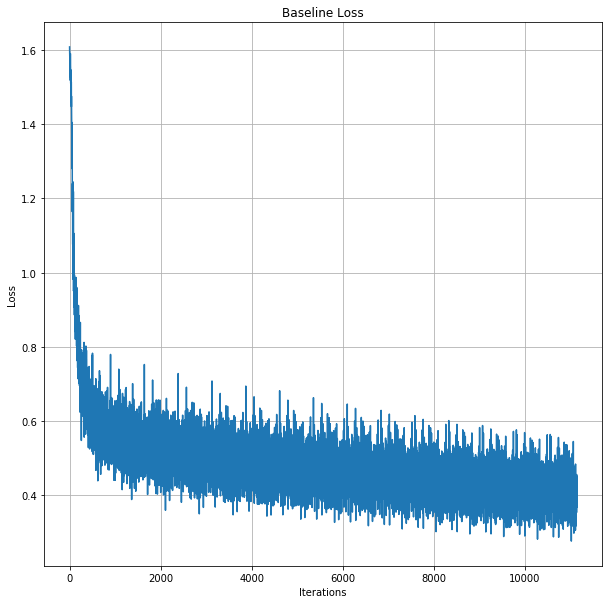

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.title('Baseline Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.plot(iteration_losses)

## Видно, что чем меньше лосс, тем он больше скачет. 

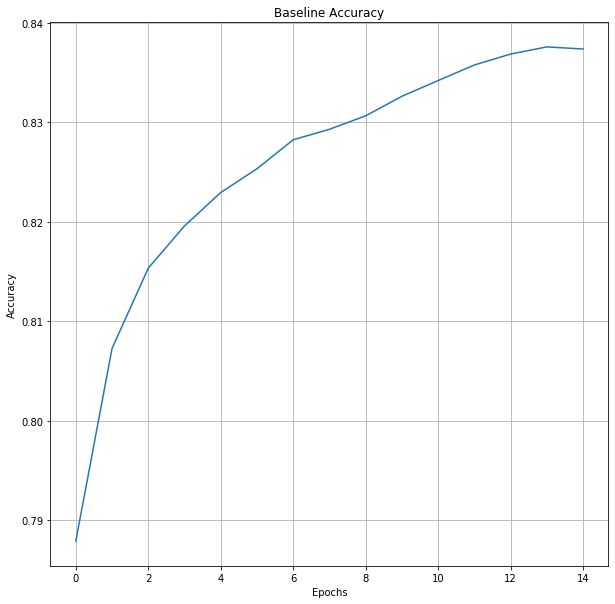

In [74]:
plt.title('Baseline Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracies)

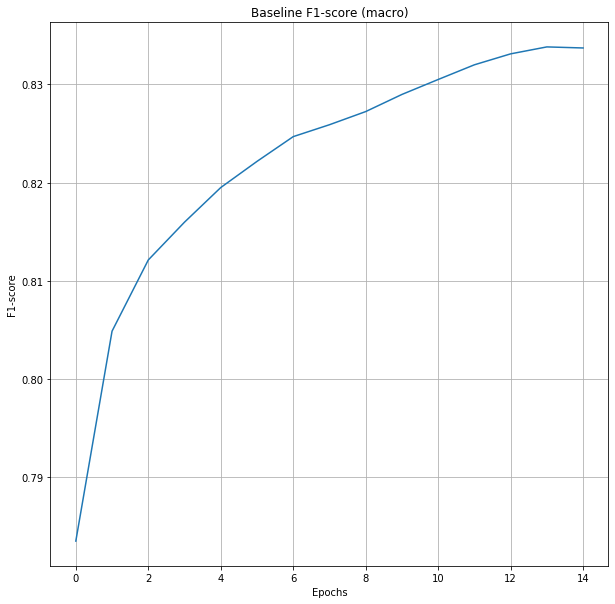

In [75]:
plt.title('Baseline F1-score (macro)')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.grid()
plt.plot(f_scores)

## Confusion matrix

In [76]:
# собираем предсказания и реальные таргеты

all_test_preds = []
all_test_targets = []

for x_test, y_test in test_loader:
    with torch.no_grad():
        pred = model.forward(x_test.to(device))
        all_test_preds.append(pred.cpu()) 
        all_test_targets.append(y_test.long())

In [77]:
all_test_preds_cat = torch.cat(all_test_preds, dim=0)
all_test_preds_argmax = torch.argmax(all_test_preds_cat, dim=1)
all_test_targets = torch.cat(all_test_targets, dim=0) 

In [78]:
# таргеты
all_test_targets[:10]

tensor([4, 0, 0, 1, 3, 3, 4, 3, 1, 3])

In [79]:
# предсказания
np.array(all_test_preds_argmax[:10])

array([4, 0, 0, 1, 4, 3, 4, 3, 1, 3])

In [80]:
cat_mapper

{'business': 0, 'law': 1, 'love': 2, 'relax': 3, 'food': 4}

In [81]:
labels = cat_mapper.keys()

In [58]:
from sklearn.metrics import confusion_matrix

In [60]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Normalized confusion matrix
[[0.73 0.18 0.02 0.07 0.01]
 [0.08 0.87 0.02 0.03 0.  ]
 [0.01 0.03 0.86 0.08 0.02]
 [0.04 0.03 0.06 0.81 0.05]
 [0.01 0.01 0.01 0.05 0.92]]


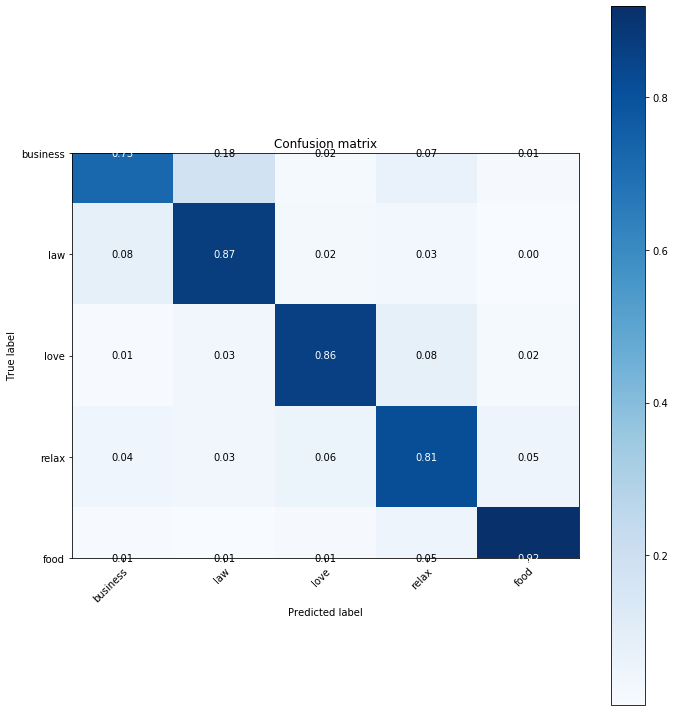

In [108]:
# confusion matrix
plot_confusion_matrix(all_test_targets, all_test_preds_argmax, classes=labels, normalize=True,
                      title='Confusion matrix')


plt.show()


Видно, что больше всего ошибок в определении категорий "бизнес" или "закон" - плохо распознается бизнес. Наиболее уверенно классификатор справляется с "едой". "Закон", в свою очередь, хорошо предсказывается, т.к. это самая многочисленная категория. 

## Теперь попробуем улучшить результаты

In [150]:
class Classifier_2(torch.nn.Module):
    
    def __init__(self, 
               embedding_tensor, 
               n_classes=5, 
               sequence_len=32, 
               rnn_model='LSTM', 
               padding_index=0, 
               hidden_size=1024,  
               batch_first=True,
               cnn_out=256,
               kernel_sizes=[2,3,4]):
  
        super(Classifier_2, self).__init__()
  
        # embeddings
        self.word_embeddings = torch.nn.Embedding.from_pretrained(embedding_tensor)
        self.word_embeddings.weight.requires_grad = False
        self.drop_en = torch.nn.Dropout(p=0.5) # СДЕЛАЕМ ДРОПАУТ ЭМБЕДДИНГОВ
        self.embed_size = embedding_tensor.shape[1]
        
        
        # BiLSTM
        if rnn_model == 'LSTM':
            self.BiLSTM = torch.nn.LSTM(input_size=self.embed_size, 
                                          hidden_size=hidden_size, 
                                          batch_first=True, 
                                          num_layers=2, # сделаем 2 lstm-слоя вместо 1
                                          bidirectional=True,
                                          dropout=0.5) # установим здесь dropout - чтобы он был на 1-ом слое bilstm
    
        # convolutional layers    
        self.CNN_layer_1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[0]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[0] + 1),
        ) # сделаем батч норм
    
        self.CNN_layer_2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[1]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[1] + 1),
        ) # сделаем батч норм
    
        self.CNN_layer_3 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[2]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[2] + 1),
        ) # сделаем батч норм
        
        self.cnn_batch_norm = torch.nn.BatchNorm1d(cnn_out*3) # и еще раз батчнорм для всего выхода с рекуррентного слоя
        self.cnn_dropout = torch.nn.Dropout(0.5) 
        self.linear = torch.nn.Linear(cnn_out*3, n_classes)  
  
    def forward(self, x):

        x_embed = self.word_embeddings(x)
        x_embed = self.drop_en(x_embed) # дропаут эмбеддингов

        # None is for initial hidden state
        out_rnn, ht = self.BiLSTM(x_embed, None)
        out_rnn = out_rnn.transpose(1, 2)
        
        out_cnn_1 = self.CNN_layer_1(out_rnn)
        out_cnn_2 = self.CNN_layer_2(out_rnn)
        out_cnn_3 = self.CNN_layer_3(out_rnn)

        out_cnn = torch.cat([out_cnn_1.squeeze(2), 
                             out_cnn_2.squeeze(2), 
                             out_cnn_3.squeeze(2)], dim=1)
    
        out_cnn = self.cnn_batch_norm(out_cnn) 
      #  out_cnn = self.cnn_dropout(out_cnn) # добавим здесь тоже dropout
        pred = self.linear(out_cnn)
        
        return pred

In [154]:
epochs = 15

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

vectors = torch.FloatTensor(vectors)
model_2 = Classifier_2(embedding_tensor=vectors).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model_2.parameters(), lr=0.0001) 

iteration_losses_2 = []
epoch_train_losses_2 = []
epoch_test_losses_2 = []
accuracies_2 = []
f_scores_2 = []

best_test_loss = 1.7 # для early stopping



for n_epoch in range(epochs):
        
    model_2.train()
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_preds = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    for x, y in train_loader:
        
        optimizer.zero_grad()
        pred = model_2(x.to(device))            
        loss = criterion(pred, y.long().to(device))  
        loss.backward()
        optimizer.step() 
        
        iteration_losses_2.append(loss.item())
        train_losses.append(loss.item())
        progress_bar.set_postfix(loss=np.mean(iteration_losses_2[-500:]))
        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    epoch_train_losses_2.append(np.mean(train_losses))
    
    model_2.eval()
  
    for x_test, y_test in test_loader:
        with torch.no_grad():
            pred = model_2(x_test.to(device))
            test_preds.append(pred.cpu()) 
        test_targets.append(y_test.long())
        loss = criterion(pred, y_test.long().to(device)) 
        test_losses.append(loss.item()) 
        
    mean_test_loss = np.mean(test_losses)
    epoch_test_losses_2.append(mean_test_loss)
    
    print('Training: train loss = {:.3f}, test loss = {:.3f} '.format(np.mean(train_losses), mean_test_loss))
    print("Evaluating...")
    
    test_preds_cat = torch.cat(test_preds, dim=0)
    test_preds_argmax = torch.argmax(test_preds_cat, dim=1)
    test_targets = torch.cat(test_targets, dim=0)  

    accuracy = accuracy_score(test_targets, test_preds_argmax)
    f_score = f1_score(test_targets, test_preds_argmax, average='macro')
    accuracies_2.append(accuracy)
    f_scores_2.append(f_score)
    print('Accuracy = {:.3f}, f1-score = {:.3f}'.format(accuracy, f_score))
    
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break    


Training: train loss = 0.783, test loss = 0.567 
Evaluating...
Accuracy = 0.802, f1-score = 0.796



Training: train loss = 0.649, test loss = 0.513 
Evaluating...
Accuracy = 0.819, f1-score = 0.815



Training: train loss = 0.593, test loss = 0.485 
Evaluating...
Accuracy = 0.827, f1-score = 0.823



Training: train loss = 0.567, test loss = 0.478 
Evaluating...
Accuracy = 0.829, f1-score = 0.824



Training: train loss = 0.551, test loss = 0.475 
Evaluating...
Accuracy = 0.830, f1-score = 0.825



Training: train loss = 0.539, test loss = 0.464 
Evaluating...
Accuracy = 0.832, f1-score = 0.828



Training: train loss = 0.528, test loss = 0.461 
Evaluating...
Accuracy = 0.835, f1-score = 0.830



Training: train loss = 0.521, test loss = 0.451 
Evaluating...
Accuracy = 0.837, f1-score = 0.833



Training: train loss = 0.513, test loss = 0.450 
Evaluating...
Accuracy = 0.838, f1-score = 0.835



Training: train loss = 0.505, test loss = 0.446 
Evaluating...
Accuracy = 0.839, f1-score = 0.835



Training: train loss = 0.497, test loss = 0.439 
Evaluating...
Accuracy = 0.843, f1-score = 0.840



Training: train loss = 0.491, test loss = 0.440 
Evaluating...
Accuracy = 0.841, f1-score = 0.837
Early stopping


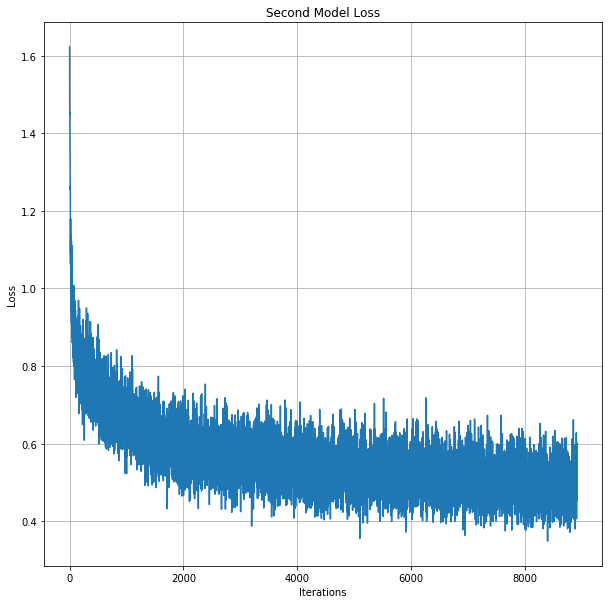

In [155]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.title('Second Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.plot(iteration_losses_2)

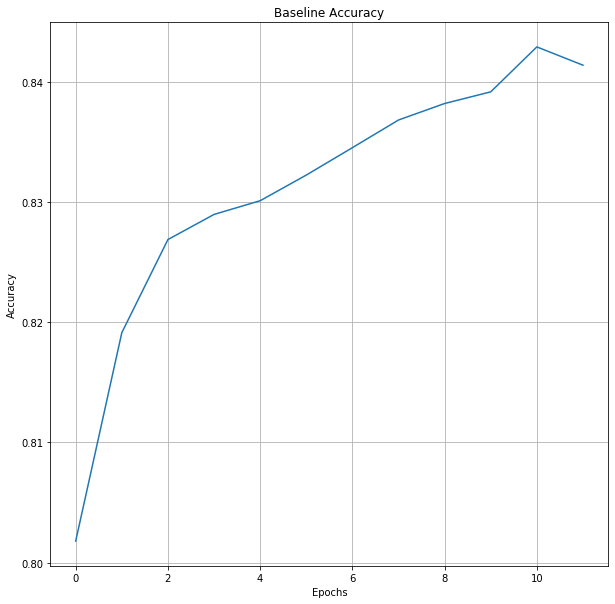

In [158]:
plt.title('Baseline Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracies_2)

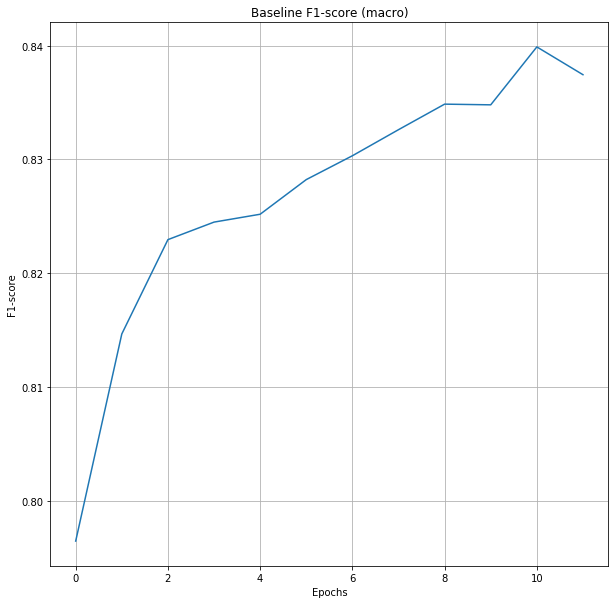

In [157]:
plt.title('Baseline F1-score (macro)')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.grid()
plt.plot(f_scores_2)

Сетка обучается на 2-3 эпохи быстрее с дропаутами на слоях bilstm и cnn и с батч нормом, а также с ELU вместо RELU. Но на 13 эпохе действует early stopping. Получается F1 = 0.84. По графику лосса видно, что обучение проходит чуть-чуть ровнее, особенно в начале, но этого недостаточно. 

## Попробуем добавить Scheduler

In [33]:
# (копипаста классификатора 2 под другим названием)

class Classifier_3(torch.nn.Module):
    
    def __init__(self, 
               embedding_tensor, 
               n_classes=5, 
               sequence_len=32, 
               rnn_model='LSTM', 
               padding_index=0, 
               hidden_size=1024,  
               batch_first=True,
               cnn_out=256,
               kernel_sizes=[2,3,4]):
  
        super(Classifier_3, self).__init__()
  
        # embeddings
        self.word_embeddings = torch.nn.Embedding.from_pretrained(embedding_tensor)
        self.word_embeddings.weight.requires_grad = False
        self.drop_en = torch.nn.Dropout(p=0.5) # СДЕЛАЕМ ДРОПАУТ ЭМБЕДДИНГОВ
        self.embed_size = embedding_tensor.shape[1]
        
        
        # BiLSTM
        if rnn_model == 'LSTM':
            self.BiLSTM = torch.nn.LSTM(input_size=self.embed_size, 
                                          hidden_size=hidden_size, 
                                          batch_first=True, 
                                          num_layers=2, # сделаем 2 lstm-слоя вместо 1
                                          bidirectional=True,
                                          dropout=0.5) # установим здесь dropout - чтобы он был на 1-ом слое bilstm

        # convolutional layers    
        self.CNN_layer_1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[0]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[0] + 1),
        ) # сделаем батч норм
    
        self.CNN_layer_2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[1]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[1] + 1),
        ) # сделаем батч норм
    
        self.CNN_layer_3 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=hidden_size*2, out_channels=cnn_out, kernel_size=kernel_sizes[2]),
            torch.nn.BatchNorm1d(cnn_out),
            torch.nn.ELU(), # попробуем ELU
            torch.nn.MaxPool1d(kernel_size=sequence_len - kernel_sizes[2] + 1),
        ) # сделаем батч норм
        
        self.cnn_batch_norm = torch.nn.BatchNorm1d(cnn_out*3) # и еще раз батчнорм для всего выхода с рекуррентного слоя
        self.cnn_dropout = torch.nn.Dropout(0.5) 
        self.linear = torch.nn.Linear(cnn_out*3, n_classes)  
  
    def forward(self, x):

        x_embed = self.word_embeddings(x)
        x_embed = self.drop_en(x_embed) # дропаут эмбеддингов

        # None is for initial hidden state
        out_rnn, ht = self.BiLSTM(x_embed, None)
        out_rnn = out_rnn.transpose(1, 2)
        
        out_cnn_1 = self.CNN_layer_1(out_rnn)
        out_cnn_2 = self.CNN_layer_2(out_rnn)
        out_cnn_3 = self.CNN_layer_3(out_rnn)

        out_cnn = torch.cat([out_cnn_1.squeeze(2), 
                             out_cnn_2.squeeze(2), 
                             out_cnn_3.squeeze(2)], dim=1)
    
        out_cnn = self.cnn_batch_norm(out_cnn)
      #  out_cnn = self.cnn_dropout(out_cnn) # добавим здесь тоже dropout
        pred = self.linear(out_cnn)
        
        return pred

In [34]:
train_loader = DataLoader(train_data, batch_size=256, drop_last=True)
test_loader = DataLoader(test_data, batch_size=256, drop_last=True)

epochs = 15

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Попробуем SCHEDULER, но сначала определим оптимальный lr

In [58]:
min_lr = 10e-7
max_lr = 10e1
# всего у нас на 15 эпох примерно 11,5 тыс. итераций. Будем определять оптимальный learning rate на 10% - на 1150 итерациях. 
n_test_iter = 1150

In [ ]:
#!pip install torch-lr-finder

In [59]:
from torch_lr_finder import LRFinder
from torch import optim

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


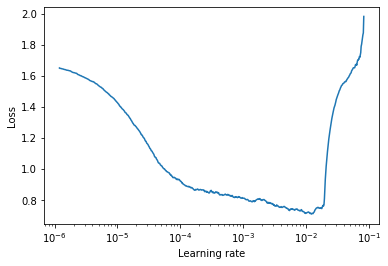

In [61]:
model_3 = Classifier_3(embedding_tensor=vectors)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model_3.parameters(), lr=min_lr)
lr_finder = LRFinder(model_3, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=max_lr, num_iter=n_test_iter, step_mode="exp")
lr_finder.plot()

## C Adam оптимальный lr - от 10^(-6) до 10^(-2).  В итоге остановлюсь на 10^(-4)

In [43]:
from sklearn.metrics import accuracy_score, f1_score
from torch import optim

vectors = torch.FloatTensor(vectors)
model_3 = Classifier_3(embedding_tensor=vectors).to(device)

optimizer = optim.Adam(model_3.parameters(), lr=10e-4)
criterion = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4,7,9], gamma=0.5, last_epoch=-1)
# 3 раза за обучение изменим learning rate - сократим его в 2 раза на 5, 8 и 10 эпохе (4,7,9). 

iteration_losses_3 = []
epoch_train_losses_3 = []
epoch_test_losses_3 = []
accuracies_3 = []
f_scores_3 = []

best_test_loss = 1.7 # для early stopping

for n_epoch in range(epochs):
        
    model_3.train()
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_preds = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    for x, y in train_loader:
        
        optimizer.zero_grad()
        pred = model_3(x.to(device))            
        loss = criterion(pred, y.long().to(device))  
        loss.backward()
        optimizer.step() 
        
        iteration_losses_3.append(loss.item())
        train_losses.append(loss.item())
        progress_bar.set_postfix(loss=np.mean(iteration_losses_3[-500:]))
        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    epoch_train_losses_3.append(np.mean(train_losses))
    
    model_3.eval()    
  
    for x_test, y_test in test_loader:
        with torch.no_grad():
            pred = model_3.forward(x_test.to(device))
            test_preds.append(pred.cpu()) 
        test_targets.append(y_test.long())
        loss = criterion(pred, y_test.long().to(device)) 
        test_losses.append(loss.item()) 
    
    mean_test_loss = np.mean(test_losses)
    epoch_test_losses_3.append(mean_test_loss)
    
    print('Training: train loss = {:.3f}, test loss = {:.3f} '.format(np.mean(train_losses), mean_test_loss))
    print("Evaluating...")
    
    test_preds_cat = torch.cat(test_preds, dim=0)
    test_preds_argmax = torch.argmax(test_preds_cat, dim=1)
    test_targets = torch.cat(test_targets, dim=0)  

    accuracy = accuracy_score(test_targets, test_preds_argmax)
    f_score = f1_score(test_targets, test_preds_argmax, average='macro')
    accuracies_3.append(accuracy)
    f_scores_3.append(f_score)
    print('Accuracy = {:.3f}, f1-score = {:.3f}'.format(accuracy, f_score))
    
    scheduler.step() # вот здесь наш шедьюер
    
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break    


Training: train loss = 0.674, test loss = 0.505 
Evaluating...
Accuracy = 0.814, f1-score = 0.815



Training: train loss = 0.561, test loss = 0.471 
Evaluating...
Accuracy = 0.830, f1-score = 0.827



Training: train loss = 0.532, test loss = 0.466 
Evaluating...
Accuracy = 0.830, f1-score = 0.828



Training: train loss = 0.514, test loss = 0.446 
Evaluating...
Accuracy = 0.839, f1-score = 0.836



Training: train loss = 0.496, test loss = 0.441 
Evaluating...
Accuracy = 0.839, f1-score = 0.836



Training: train loss = 0.470, test loss = 0.425 
Evaluating...
Accuracy = 0.845, f1-score = 0.841



Training: train loss = 0.460, test loss = 0.420 
Evaluating...
Accuracy = 0.847, f1-score = 0.844



Training: train loss = 0.452, test loss = 0.423 
Evaluating...
Accuracy = 0.846, f1-score = 0.843
Early stopping


# Итак, у этой модели особой разницы с предыдущей моделью нет, разве что она чуть быстрее сошлась

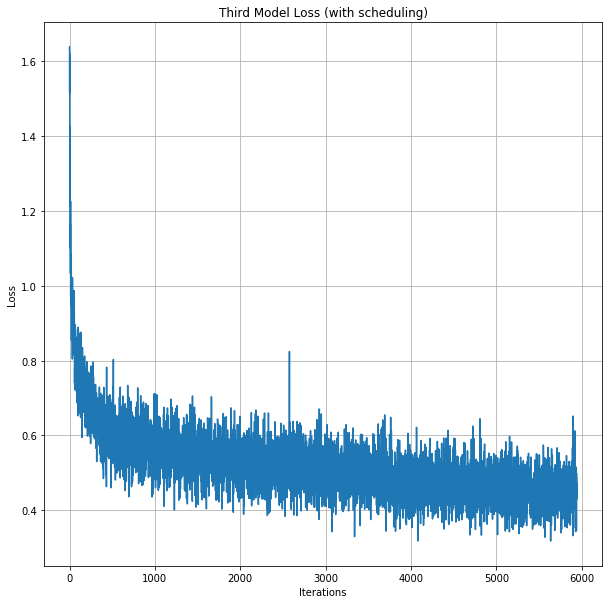

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.title('Third Model Loss (with scheduling)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.plot(iteration_losses_3)

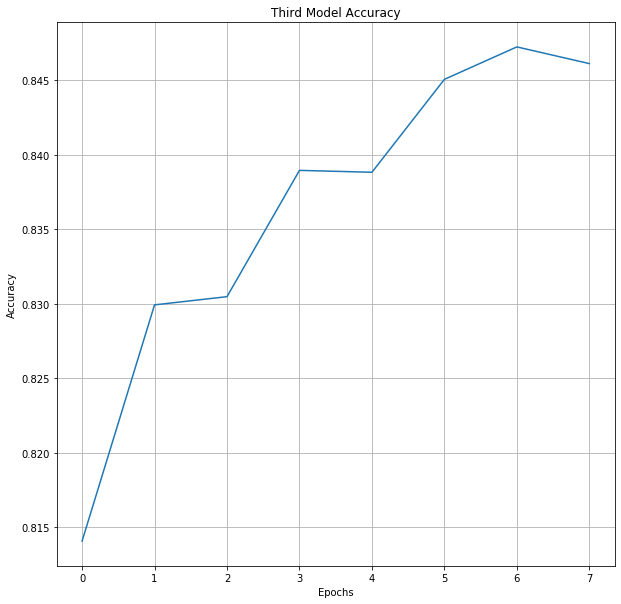

In [48]:
plt.title('Third Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracies_3)

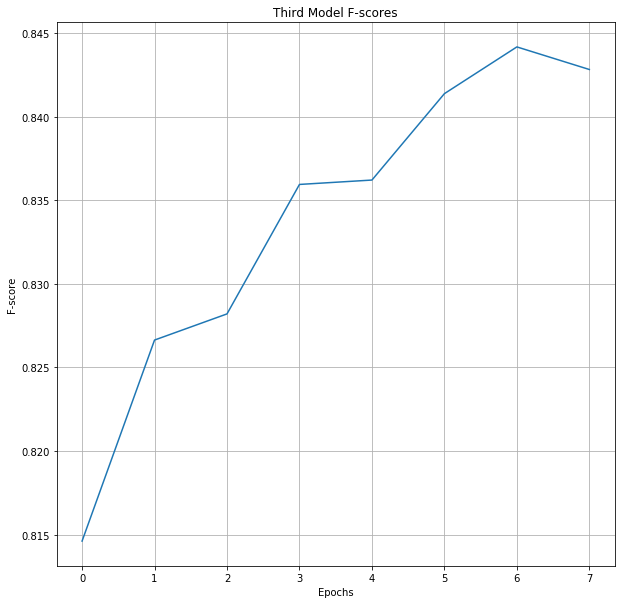

In [49]:
plt.title('Third Model F-scores')
plt.xlabel('Epochs')
plt.ylabel('F-score')
plt.grid()
plt.plot(f_scores_3)

# Теперь будем уменьшать learning rate с помощью scheduler-а тем чаще, чем позднее наша эпоха - сделаем больше milestones ближе к концу обучения

In [51]:
from sklearn.metrics import accuracy_score, f1_score
from torch import optim

vectors = torch.FloatTensor(vectors)
model_4 = Classifier_3(embedding_tensor=vectors).to(device)

optimizer = optim.Adam(model_4.parameters(), lr=10e-4)
criterion = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4,6,8,9,10,11,12], gamma=0.5, last_epoch=-1)

iteration_losses_4 = []
epoch_train_losses_4 = []
epoch_test_losses_4 = []
accuracies_4 = []
f_scores_4 = []

best_test_loss = 1.7 # для early stopping

for n_epoch in range(epochs):
        
    model_4.train()
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_preds = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    for x, y in train_loader:
        
        optimizer.zero_grad()
        pred = model_4(x.to(device))            
        loss = criterion(pred, y.long().to(device))  
        loss.backward()
        optimizer.step() 
        
        iteration_losses_4.append(loss.item())
        train_losses.append(loss.item())
        progress_bar.set_postfix(loss=np.mean(iteration_losses_4[-500:]))
        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    epoch_train_losses_4.append(np.mean(train_losses))
    
    model_4.eval()    
  
    for x_test, y_test in test_loader:
        with torch.no_grad():
            pred = model_4.forward(x_test.to(device))
            test_preds.append(pred.cpu()) 
        test_targets.append(y_test.long())
        loss = criterion(pred, y_test.long().to(device)) 
        test_losses.append(loss.item()) 
    
    mean_test_loss = np.mean(test_losses)
    epoch_test_losses_4.append(mean_test_loss)
    
    print('Training: train loss = {:.3f}, test loss = {:.3f} '.format(np.mean(train_losses), mean_test_loss))
    print("Evaluating...")
    
    test_preds_cat = torch.cat(test_preds, dim=0)
    test_preds_argmax = torch.argmax(test_preds_cat, dim=1)
    test_targets = torch.cat(test_targets, dim=0)  

    accuracy = accuracy_score(test_targets, test_preds_argmax)
    f_score = f1_score(test_targets, test_preds_argmax, average='macro')
    accuracies_4.append(accuracy)
    f_scores_4.append(f_score)
    print('Accuracy = {:.3f}, f1-score = {:.3f}'.format(accuracy, f_score))
    
    scheduler.step()
    
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break    


Training: train loss = 0.671, test loss = 0.520 
Evaluating...
Accuracy = 0.808, f1-score = 0.810



Training: train loss = 0.561, test loss = 0.480 
Evaluating...
Accuracy = 0.826, f1-score = 0.823



Training: train loss = 0.533, test loss = 0.462 
Evaluating...
Accuracy = 0.830, f1-score = 0.827



Training: train loss = 0.515, test loss = 0.455 
Evaluating...
Accuracy = 0.835, f1-score = 0.832



Training: train loss = 0.497, test loss = 0.441 
Evaluating...
Accuracy = 0.841, f1-score = 0.837



Training: train loss = 0.471, test loss = 0.426 
Evaluating...
Accuracy = 0.845, f1-score = 0.841



Training: train loss = 0.463, test loss = 0.422 
Evaluating...
Accuracy = 0.846, f1-score = 0.842



Training: train loss = 0.445, test loss = 0.416 
Evaluating...
Accuracy = 0.848, f1-score = 0.845



Training: train loss = 0.439, test loss = 0.416 
Evaluating...
Accuracy = 0.848, f1-score = 0.845



Training: train loss = 0.429, test loss = 0.413 
Evaluating...
Accuracy = 0.849, f1-score = 0.845



Training: train loss = 0.420, test loss = 0.412 
Evaluating...
Accuracy = 0.850, f1-score = 0.846



Training: train loss = 0.416, test loss = 0.412 
Evaluating...
Accuracy = 0.850, f1-score = 0.847



Training: train loss = 0.414, test loss = 0.412 
Evaluating...
Accuracy = 0.851, f1-score = 0.847



Training: train loss = 0.414, test loss = 0.411 
Evaluating...
Accuracy = 0.851, f1-score = 0.847



Training: train loss = 0.412, test loss = 0.411 
Evaluating...
Accuracy = 0.851, f1-score = 0.848
Early stopping


## На графиках ниже видно, что лосс особо не меняется от модели к модели, зато scheduler с постепенным уменьшением learning rate на последних эпохах помог немного дотянуть F-меру до практически 0.85 

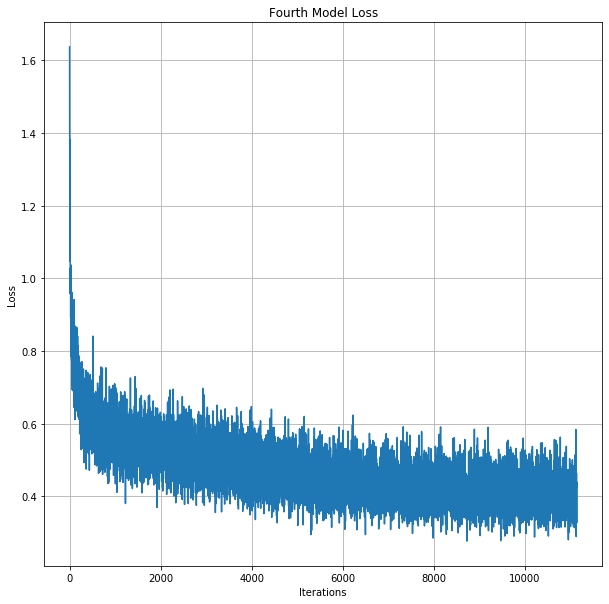

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.title('Fourth Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.plot(iteration_losses_4)

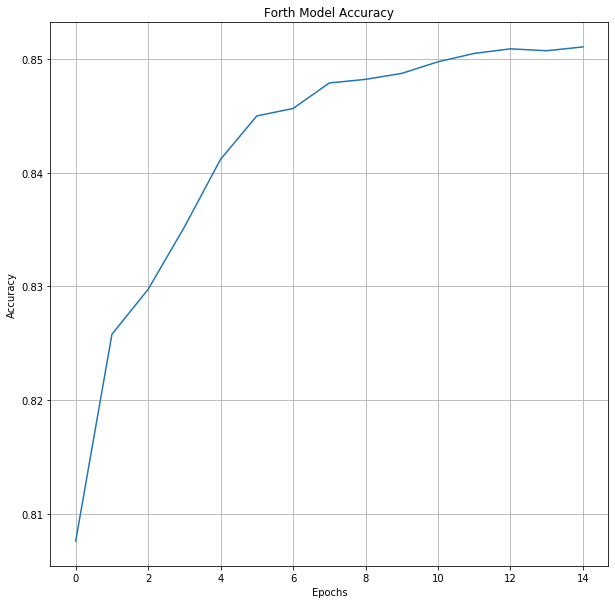

In [55]:
plt.title('Fourth Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracies_4)

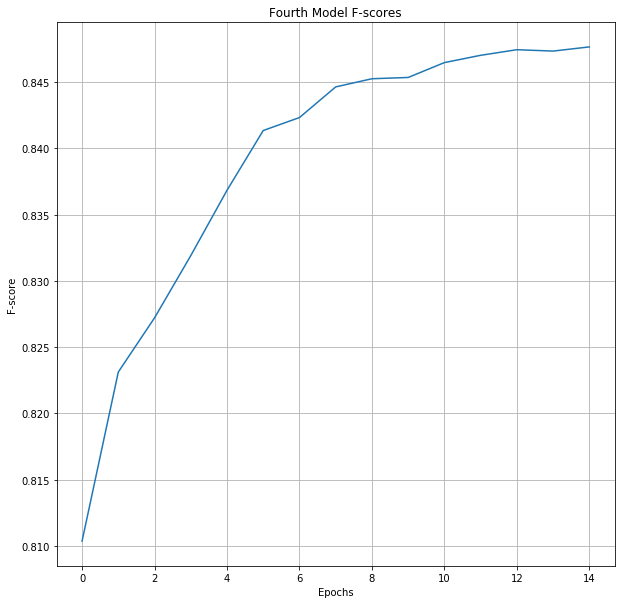

In [57]:
plt.title('Fourth Model F-scores')
plt.xlabel('Epochs')
plt.ylabel('F-score')
plt.grid()
plt.plot(f_scores_4)

# Также мы видим на графиках, что более низкий lr стимулировал более быстрый рост метрик после эпох 4, 6, 8

In [61]:
# собираем предсказания и реальные таргеты

all_test_preds = []
all_test_targets = []

for x_test, y_test in test_loader:
    with torch.no_grad():
        pred = model_4.forward(x_test.to(device))
        all_test_preds.append(pred.cpu()) 
        all_test_targets.append(y_test.long())

In [62]:
all_test_preds_cat = torch.cat(all_test_preds, dim=0)
all_test_preds_argmax = torch.argmax(all_test_preds_cat, dim=1)
all_test_targets = torch.cat(all_test_targets, dim=0) 

In [63]:
labels = cat_mapper.keys()
labels

dict_keys(['business', 'law', 'love', 'relax', 'food'])

Normalized confusion matrix
[[0.75 0.16 0.01 0.07 0.01]
 [0.08 0.88 0.02 0.02 0.  ]
 [0.01 0.03 0.86 0.09 0.01]
 [0.03 0.03 0.05 0.84 0.05]
 [0.01 0.01 0.01 0.04 0.93]]


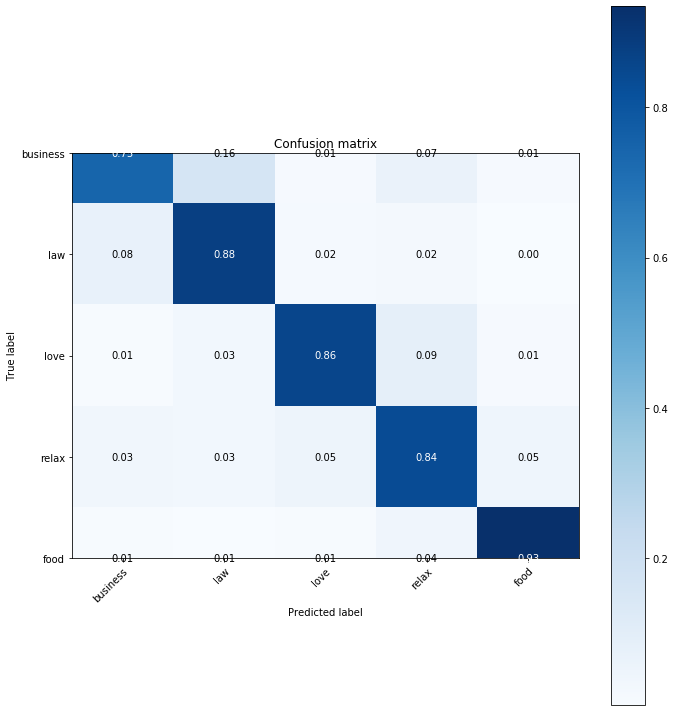

In [64]:
# confusion matrix
plot_confusion_matrix(all_test_targets, all_test_preds_argmax, classes=labels, normalize=True,
                      title='Confusion matrix')


plt.show()

# А вот так выглядела предыдущая: 

Normalized confusion matrix

[[0.73 0.18 0.02 0.07 0.01]

 [0.08 0.87 0.02 0.03 0.  ]
 
 [0.01 0.03 0.86 0.08 0.02]
 
 [0.04 0.03 0.06 0.81 0.05]
 
 [0.01 0.01 0.01 0.05 0.92]]

# В итоге качество распознавания 4 классов из 5 повысилось на 1-3 процента, 1 класса - не изменилось